In [0]:
f = open('kaggle.json', 'w')
f.write('{"username":"username","key":"key"}')
f.close()

In [2]:
!pip install -q kaggle
!pip install plotly
!pip install mpl_finance

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

  Using cached https://files.pythonhosted.org/packages/d3/83/92f0593ea39122075d115d2578034283bcc790f679cdbe61d0d3902c59f1/mpl_finance-0.10.0.tar.gz
  Running setup.py bdist_wheel for mpl-finance ... - done
  Stored in directory: /root/.cache/pip/wheels/67/db/24/04ddd06ec9a5e4500b44c13d8e95898f5b90b512303e385de8
Successfully built mpl-finance


In [3]:
import os 

if not os.path.isdir('/content/.kaggle/datasets/jessevent/all-crypto-currencies/'):
    print("file empty. download start")
    !kaggle datasets download -d jessevent/all-crypto-currencies
    !unzip -o all-crypto-currencies.zip
else :
    print("file already downloads. file list : ")
    !ls /Users/bevislee/.kaggle/datasets/jessevent/all-crypto-currencies/

file empty. download start
 50%|██████████████████▉                   | 9.00M/18.0M [00:00<00:00, 25.8MB/s]
100%|██████████████████████████████████████| 18.0M/18.0M [00:00<00:00, 45.6MB/s]
Archive:  all-crypto-currencies.zip
  inflating: crypto-markets.csv      


In [4]:
!pip install plotly
!pip install tqdm

In [5]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

from tqdm import tqdm

import plotly.plotly as py
import plotly.graph_objs as go
#import plotly.figure_factory as FF

import plotly
import plotly.offline as offline

offline.init_notebook_mode()

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 

plt.style.use('fivethirtyeight')


In [6]:
crypto_markets = pd.read_csv('crypto-markets.csv')
crypto_markets['date'] = pd.to_datetime(crypto_markets['date'])

crypto_markets.tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
785019,aston,ATX,Aston,2018-05-20,1645,0.174143,0.174143,0.157184,0.167866,854900.0,0.0,0.6299,0.02
785020,aston,ATX,Aston,2018-05-21,1645,0.168075,0.169099,0.165706,0.166054,845673.0,0.0,0.1026,0.00
785021,aston,ATX,Aston,2018-05-22,1645,0.156766,0.157625,0.142146,0.150380,486511.0,0.0,0.5319,0.02
785022,aston,ATX,Aston,2018-05-23,1645,0.147663,0.169331,0.131630,0.138031,1411730.0,0.0,0.1698,0.04
785023,aston,ATX,Aston,2018-05-24,1645,0.142871,0.157774,0.139641,0.148132,821824.0,0.0,0.4683,0.02


In [7]:
name_df = crypto_markets.groupby('name').agg({'date' : ['min', 'max']}).rename(columns={'min':'s_date','max':'c_date'}).reset_index()
name_df.columns = name_df.columns.droplevel(0)
name_df.columns = ['name', 'start_date','current_date']
name_df = name_df.sort_values(['start_date'])

name_df.head()

,name,start_date,current_date
1420,Terracoin,2013-04-28,2018-06-06
1093,Peercoin,2013-04-28,2018-06-06
863,Litecoin,2013-04-28,2018-06-06
173,Bitcoin,2013-04-28,2018-06-06
1014,Novacoin,2013-04-28,2018-06-06


In [8]:
name = crypto_markets['name'].unique()

name[:2]

array(['Bitcoin', 'Ethereum'], dtype=object)

In [9]:
cor_df = pd.DataFrame()
for n in tqdm(name) :
    temp = crypto_markets.loc[crypto_markets.name==n,['date','close']]
    temp.columns = ['date',n]
    if len(cor_df) == 0 :
        cor_df = temp.copy()
    else :
        cor_df = pd.merge(cor_df, temp, how='outer',on='date')

#cor_df = cor_df.fillna(0)
print("shape :",cor_df.shape)

cor_df.head()

100%|██████████| 1643/1643 [06:21<00:00,  4.31it/s]

shape : (2682, 1644)


,date,Bitcoin,Ethereum,Ripple,Bitcoin Cash,EOS,Litecoin,Stellar,Cardano,IOTA,...,FAPcoin,PlexCoin,Madcoin,Titanium Blockchain,Vcash,eREAL,DavorCoin,ENTCash,Jingtum Tech,Aston
0,2013-04-28,134.21,NaN,NaN,NaN,NaN,4.35,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-29,144.54,NaN,NaN,NaN,NaN,4.38,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-30,139.00,NaN,NaN,NaN,NaN,4.30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-01,116.99,NaN,NaN,NaN,NaN,3.80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-05-02,105.21,NaN,NaN,NaN,NaN,3.37,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Cardano_corr = cor_df[cor_df.date>"2017-10-01"].dropna(axis=1, how="any").corr().reset_index()[['index','Cardano']].sort_values(['Cardano']).rename(index=str, columns={"index": "name"})

Cardano_corr.tail()

,name,Cardano
177,Pascal Coin,0.945307
38,DigiByte,0.946429
2,Ripple,0.951863
40,Status,0.966971
7,Cardano,1.000000


In [11]:
Cardano_corr_list = Cardano_corr.loc[Cardano_corr['Cardano'].abs()>0.85,'name'].values

Cardano_corr_list

array(['Monero', 'Halloween Coin', 'ZSEcoin', 'Iconomi', 'Bitmark',
       'Titcoin', 'Crown', 'LoMoCoin', 'Counterparty', 'BitBay',
       'Populous', 'Bytecent', 'DeepOnion', 'CloakCoin', 'VeriumReserve',
       '8Bit', 'Canada eCoin', 'TrezarCoin', 'Breakout', 'Quatloo', 'Kin',
       'Mineum', 'Komodo', 'Mooncoin', 'EuropeCoin', 'Ark', 'Stealth',
       'ChainLink', 'GlobalBoost-Y', 'Lunyr', 'Golem', 'Anoncoin',
       'NeosCoin', 'Nexus', 'Databits', 'Prime-XI', 'PinkCoin',
       'SOILcoin', 'Humaniq', 'Aragon', 'Comet', 'Elixir', 'PoSW Coin',
       'Melon', 'Gulden', 'Expanse', 'Experience Points', 'Argus',
       'Triggers', 'Joulecoin', 'Sativacoin', 'Mercury', 'Fantasy Cash',
       'Nyancoin', 'LiteBitcoin', 'Veritaseum', 'OmiseGO', 'RedCoin',
       'Nimiq Exchange Token', 'Civic', 'Tokes', 'ColossusXT', 'e-Gulden',
       'Omni', 'Wings', 'Syscoin', 'Coin2.1', 'BlackCoin', 'Pluton',
       'ChessCoin', 'Byteball Bytes', 'Ratecoin', 'Dent', 'Espers',
       'Sumokoin', 'ad

In [12]:
Cardano_df_set = pd.DataFrame()
for n in tqdm(Cardano_corr_list) :
    temp = crypto_markets.loc[crypto_markets.name==n,['date','open','high','low','volume','market','close_ratio','spread','close']]
    temp.columns = ['date',n+'_open',n+'_high',n+'_low',n+'_volume',n+'_market',n+'_close_ratio',n+'_spread',n+'_close']
    if len(Cardano_df_set) == 0 :
        Cardano_df_set = temp.copy()
    else :
        Cardano_df_set = pd.merge(Cardano_df_set, temp, how='outer',on='date')

Cardano_df_set = Cardano_df_set[Cardano_df_set.date>"2017-10-02"]
print("shape :",Cardano_df_set.shape)

Cardano_df_set.head()


100%|██████████| 161/161 [00:13<00:00, 12.08it/s]

shape : (247, 1289)


,date,Monero_open,Monero_high,Monero_low,Monero_volume,Monero_market,Monero_close_ratio,Monero_spread,Monero_close,Halloween Coin_open,...,Status_spread,Status_close,Cardano_open,Cardano_high,Cardano_low,Cardano_volume,Cardano_market,Cardano_close_ratio,Cardano_spread,Cardano_close
1230,2017-10-03,91.52,94.81,87.21,44289800.0,1.387960e+09,0.7566,7.60,92.96,0.000252,...,0.0,0.027222,0.025757,0.027425,0.020690,16997800.0,624651000.0,0.0187,0.01,0.020816
1231,2017-10-04,92.95,93.65,89.05,29568100.0,1.410000e+09,0.2957,4.60,90.41,0.000178,...,0.0,0.027554,0.020864,0.022806,0.020864,9000050.0,540946000.0,0.5494,0.00,0.021931
1232,2017-10-05,90.49,92.45,88.14,27697400.0,1.373110e+09,0.8631,4.31,91.86,0.000211,...,0.0,0.027321,0.021951,0.022154,0.020859,5562510.0,569134000.0,0.4865,0.00,0.021489
1233,2017-10-06,91.91,92.94,90.23,24504100.0,1.394580e+09,0.3542,2.71,91.19,0.000215,...,0.0,0.028313,0.021359,0.021542,0.018360,7780710.0,553774000.0,0.0563,0.00,0.018539
1234,2017-10-07,90.94,92.05,89.57,22617600.0,1.380750e+09,0.8589,2.48,91.70,0.000234,...,0.0,0.027238,0.018414,0.021050,0.017620,7411240.0,477417000.0,0.9682,0.00,0.020941


In [13]:
Cardano_df_set['mv_20'] = Cardano_df_set.Cardano_close.rolling(window=20).mean().fillna(0.01)
Cardano_df_set['mv_50'] = Cardano_df_set.Cardano_close.rolling(window=50).mean().fillna(0.01)
Cardano_df_set['mv_200'] = Cardano_df_set.Cardano_close.rolling(window=200).mean().fillna(0.01)

Cardano_df_set.tail()

,date,Monero_open,Monero_high,Monero_low,Monero_volume,Monero_market,Monero_close_ratio,Monero_spread,Monero_close,Halloween Coin_open,...,Cardano_high,Cardano_low,Cardano_volume,Cardano_market,Cardano_close_ratio,Cardano_spread,Cardano_close,mv_20,mv_50,mv_200
1472,2018-06-02,157.59,167.27,156.25,40011500.0,2.535650e+09,0.5808,11.02,162.65,0.000166,...,0.229531,0.219242,116435000.0,5.773980e+09,0.8261,0.01,0.227742,0.225952,0.273046,0.332029
1473,2018-06-03,162.66,176.11,162.66,44074900.0,2.617760e+09,0.4974,13.45,169.35,0.000153,...,0.236761,0.225118,117208000.0,5.903600e+09,0.2608,0.01,0.228154,0.223688,0.273592,0.333038
1474,2018-06-04,169.06,170.51,157.84,39320200.0,2.721370e+09,0.1776,12.67,160.09,0.000220,...,0.231228,0.212290,115605000.0,5.915400e+09,0.0909,0.02,0.214012,0.221381,0.273444,0.333970
1475,2018-06-05,160.31,168.69,157.44,40491500.0,2.580910e+09,0.8667,11.25,167.19,0.000227,...,0.221728,0.204815,119846000.0,5.554790e+09,0.9254,0.02,0.220467,0.219586,0.272720,0.334943
1476,2018-06-06,167.15,167.80,162.08,41766300.0,2.691610e+09,0.4423,5.72,164.61,0.000239,...,0.220862,0.210708,84766300.0,5.718610e+09,0.4937,0.01,0.215721,0.218189,0.272160,0.335890


In [14]:
Cardano_df_set['mv_20_bb_0'] = Cardano_df_set.mv_20.values + 2 * np.std(Cardano_df_set.mv_20.values)
Cardano_df_set['mv_50_bb_0'] = Cardano_df_set.mv_50.values + 2 * np.std(Cardano_df_set.mv_50.values)
Cardano_df_set['mv_200_bb_0'] = Cardano_df_set.mv_200.values + 2 * np.std(Cardano_df_set.mv_200.values)

Cardano_df_set['mv_20_bb_1'] = Cardano_df_set.mv_20.values - 2 * np.std(Cardano_df_set.mv_20.values)
Cardano_df_set['mv_50_bb_1'] = Cardano_df_set.mv_50.values - 2 * np.std(Cardano_df_set.mv_50.values)
Cardano_df_set['mv_200_bb_1'] = Cardano_df_set.mv_200.values - 2 * np.std(Cardano_df_set.mv_200.values)

Cardano_df_set.tail()

,date,Monero_open,Monero_high,Monero_low,Monero_volume,Monero_market,Monero_close_ratio,Monero_spread,Monero_close,Halloween Coin_open,...,Cardano_close,mv_20,mv_50,mv_200,mv_20_bb_0,mv_50_bb_0,mv_200_bb_0,mv_20_bb_1,mv_50_bb_1,mv_200_bb_1
1472,2018-06-02,157.59,167.27,156.25,40011500.0,2.535650e+09,0.5808,11.02,162.65,0.000166,...,0.227742,0.225952,0.273046,0.332029,0.669190,0.677429,0.569925,-0.217285,-0.131338,0.094133
1473,2018-06-03,162.66,176.11,162.66,44074900.0,2.617760e+09,0.4974,13.45,169.35,0.000153,...,0.228154,0.223688,0.273592,0.333038,0.666926,0.677975,0.570934,-0.219549,-0.130792,0.095142
1474,2018-06-04,169.06,170.51,157.84,39320200.0,2.721370e+09,0.1776,12.67,160.09,0.000220,...,0.214012,0.221381,0.273444,0.333970,0.664619,0.677828,0.571866,-0.221857,-0.130940,0.096074
1475,2018-06-05,160.31,168.69,157.44,40491500.0,2.580910e+09,0.8667,11.25,167.19,0.000227,...,0.220467,0.219586,0.272720,0.334943,0.662824,0.677104,0.572840,-0.223652,-0.131663,0.097047
1476,2018-06-06,167.15,167.80,162.08,41766300.0,2.691610e+09,0.4423,5.72,164.61,0.000239,...,0.215721,0.218189,0.272160,0.335890,0.661426,0.676544,0.573786,-0.225049,-0.132223,0.097994


In [15]:
Cardano_df_set['pdm'] = Cardano_df_set.Cardano_high - Cardano_df_set.Cardano_high.shift(-1)
Cardano_df_set['mdm'] = Cardano_df_set.Cardano_low.shift(-1) - Cardano_df_set.Cardano_low
Cardano_df_set = Cardano_df_set.fillna(0.01)

Cardano_df_set.head()

,date,Monero_open,Monero_high,Monero_low,Monero_volume,Monero_market,Monero_close_ratio,Monero_spread,Monero_close,Halloween Coin_open,...,mv_50,mv_200,mv_20_bb_0,mv_50_bb_0,mv_200_bb_0,mv_20_bb_1,mv_50_bb_1,mv_200_bb_1,pdm,mdm
1230,2017-10-03,91.52,94.81,87.21,44289800.0,1.387960e+09,0.7566,7.60,92.96,0.000252,...,0.01,0.01,0.453238,0.414384,0.247896,-0.433238,-0.394384,-0.227896,0.004619,0.000174
1231,2017-10-04,92.95,93.65,89.05,29568100.0,1.410000e+09,0.2957,4.60,90.41,0.000178,...,0.01,0.01,0.453238,0.414384,0.247896,-0.433238,-0.394384,-0.227896,0.000652,-0.000005
1232,2017-10-05,90.49,92.45,88.14,27697400.0,1.373110e+09,0.8631,4.31,91.86,0.000211,...,0.01,0.01,0.453238,0.414384,0.247896,-0.433238,-0.394384,-0.227896,0.000612,-0.002499
1233,2017-10-06,91.91,92.94,90.23,24504100.0,1.394580e+09,0.3542,2.71,91.19,0.000215,...,0.01,0.01,0.453238,0.414384,0.247896,-0.433238,-0.394384,-0.227896,0.000492,-0.000740
1234,2017-10-07,90.94,92.05,89.57,22617600.0,1.380750e+09,0.8589,2.48,91.70,0.000234,...,0.01,0.01,0.453238,0.414384,0.247896,-0.433238,-0.394384,-0.227896,-0.002548,0.002527


In [17]:
Cardano_df_set_y = Cardano_df_set.Cardano_close.values

Cardano_df_set = Cardano_df_set.drop('Cardano_close', 1)
Cardano_df_set['Cardano_close'] = Cardano_df_set_y

Cardano_df_set.head()

,date,Monero_open,Monero_high,Monero_low,Monero_volume,Monero_market,Monero_close_ratio,Monero_spread,Monero_close,Halloween Coin_open,...,mv_200,mv_20_bb_0,mv_50_bb_0,mv_200_bb_0,mv_20_bb_1,mv_50_bb_1,mv_200_bb_1,pdm,mdm,Cardano_close
1230,2017-10-03,91.52,94.81,87.21,44289800.0,1.387960e+09,0.7566,7.60,92.96,0.000252,...,0.01,0.453238,0.414384,0.247896,-0.433238,-0.394384,-0.227896,0.004619,0.000174,0.020816
1231,2017-10-04,92.95,93.65,89.05,29568100.0,1.410000e+09,0.2957,4.60,90.41,0.000178,...,0.01,0.453238,0.414384,0.247896,-0.433238,-0.394384,-0.227896,0.000652,-0.000005,0.021931
1232,2017-10-05,90.49,92.45,88.14,27697400.0,1.373110e+09,0.8631,4.31,91.86,0.000211,...,0.01,0.453238,0.414384,0.247896,-0.433238,-0.394384,-0.227896,0.000612,-0.002499,0.021489
1233,2017-10-06,91.91,92.94,90.23,24504100.0,1.394580e+09,0.3542,2.71,91.19,0.000215,...,0.01,0.453238,0.414384,0.247896,-0.433238,-0.394384,-0.227896,0.000492,-0.000740,0.018539
1234,2017-10-07,90.94,92.05,89.57,22617600.0,1.380750e+09,0.8589,2.48,91.70,0.000234,...,0.01,0.453238,0.414384,0.247896,-0.433238,-0.394384,-0.227896,-0.002548,0.002527,0.020941


In [18]:
Cardano_df_set.Cardano_close.describe()

count    247.000000
mean       0.276851
std        0.231944
min        0.018539
25%        0.119676
50%        0.223722
75%        0.372867
max        1.110000
Name: Cardano_close, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler

xy = Cardano_df_set.drop('date', 1).values
print("before : ",xy)

scaler = MinMaxScaler()
train_sc = scaler.fit_transform(xy)

x = train_sc
y = train_sc[:,[-1]]

print("\nafter : ",train_sc)

before :  [[ 9.15200e+01  9.48100e+01  8.72100e+01 ...  4.61900e-03  1.74000e-04
   2.08160e-02]
 [ 9.29500e+01  9.36500e+01  8.90500e+01 ...  6.52000e-04 -5.00000e-06
   2.19310e-02]
 [ 9.04900e+01  9.24500e+01  8.81400e+01 ...  6.12000e-04 -2.49900e-03
   2.14890e-02]
 ...
 [ 1.69060e+02  1.70510e+02  1.57840e+02 ...  9.50000e-03 -7.47500e-03
   2.14012e-01]
 [ 1.60310e+02  1.68690e+02  1.57440e+02 ...  8.66000e-04  5.89300e-03
   2.20467e-01]
 [ 1.67150e+02  1.67800e+02  1.62080e+02 ...  1.00000e-02  1.00000e-02
   2.15721e-01]]

after :  [[0.02065881 0.02130515 0.01487719 ... 0.60557298 0.53256002 0.00208619]
 [0.02435619 0.01847423 0.01982728 ... 0.59756457 0.53223974 0.00310776]
 [0.01799566 0.01554569 0.01737914 ... 0.59748382 0.52777733 0.0027028 ]
 ...
 [0.2211449  0.20604744 0.20489091 ... 0.61542654 0.51887398 0.17909298]
 [0.19852105 0.20160582 0.2038148  ... 0.59799658 0.54279278 0.18500707]
 [0.21620643 0.19943381 0.21629765 ... 0.61643592 0.55014126 0.18065877]]


In [20]:
seq_length = 7 #timestep
data_dim = xy.shape[1] # inputsize
output_dim = 1

dataX = []
dataY = []
for i in tqdm(range(0,len(y)-seq_length)) :
    _x = x[i:i+seq_length]
    _y = y[i+seq_length]
    dataX.append(_x)
    dataY.append(_y)
    

train_size = int(len(dataY)*0.7)
test_size = len(dataY)-train_size

trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

print("trainX\n",trainX[:3])
print("testX\n",testX[:3])

print("trainY\n",trainY[:3])
print("testY\n",testY[:3])

100%|██████████| 240/240 [00:00<00:00, 54696.42it/s]

trainX
 [[[0.02065881 0.02130515 0.01487719 ... 0.60557298 0.53256002 0.00208619]
  [0.02435619 0.01847423 0.01982728 ... 0.59756457 0.53223974 0.00310776]
  [0.01799566 0.01554569 0.01737914 ... 0.59748382 0.52777733 0.0027028 ]
  ...
  [0.01915917 0.0145695  0.02122622 ... 0.59110454 0.53677014 0.00220072]
  [0.02032268 0.01493557 0.02168357 ... 0.59784518 0.53259759 0.0017756 ]
  [0.01605647 0.00985943 0.00559576 ... 0.59697711 0.53392522 0.00327543]]

 [[0.02435619 0.01847423 0.01982728 ... 0.59756457 0.53223974 0.00310776]
  [0.01799566 0.01554569 0.01737914 ... 0.59748382 0.52777733 0.0027028 ]
  [0.02166718 0.01674151 0.0230018  ... 0.59724157 0.53092463 0.        ]
  ...
  [0.02032268 0.01493557 0.02168357 ... 0.59784518 0.53259759 0.0017756 ]
  [0.01605647 0.00985943 0.00559576 ... 0.59697711 0.53392522 0.00327543]
  [0.00537801 0.00568626 0.0069678  ... 0.5959859  0.53170654 0.00274128]]

 [[0.01799566 0.01554569 0.01737914 ... 0.59748382 0.52777733 0.0027028 ]
  [0.02166718 

0 17.372875  / runtime -  00:00:07


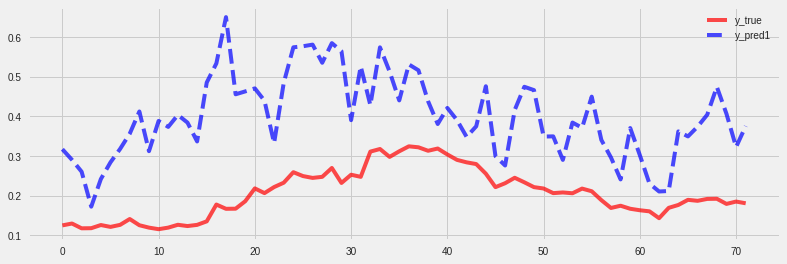

2000 0.17566007  / runtime -  00:00:47


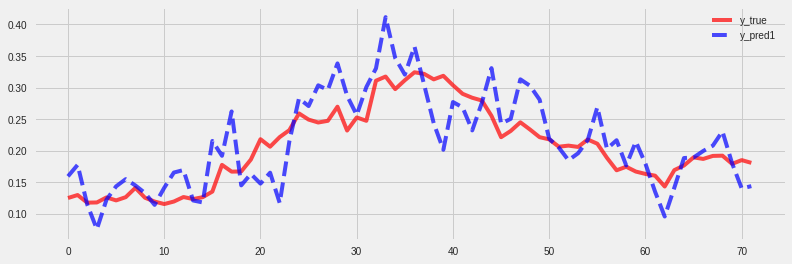

4000 0.05228346  / runtime -  00:01:26


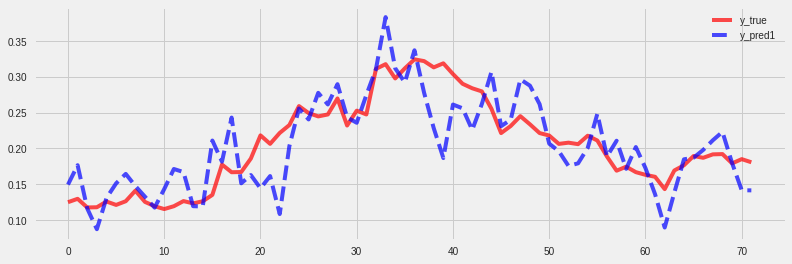

6000 0.013169879  / runtime -  00:02:05


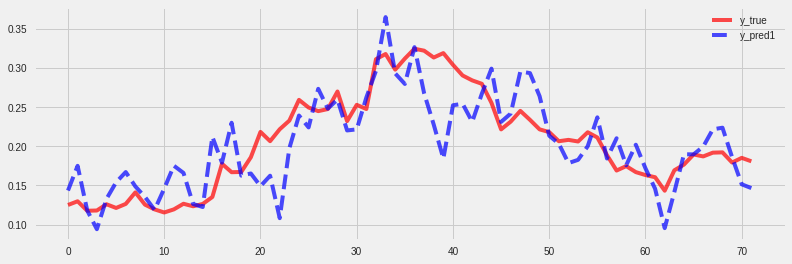

8000 0.0017945839  / runtime -  00:02:44


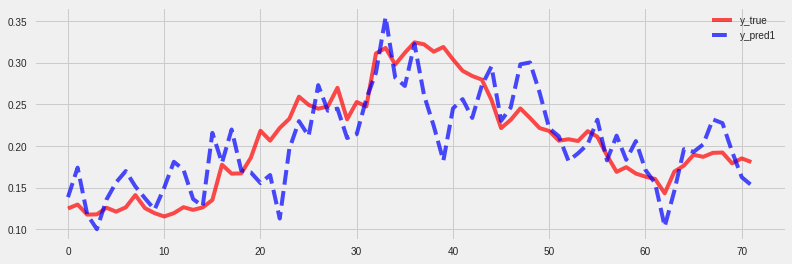

10000 7.91816e-05  / runtime -  00:03:24


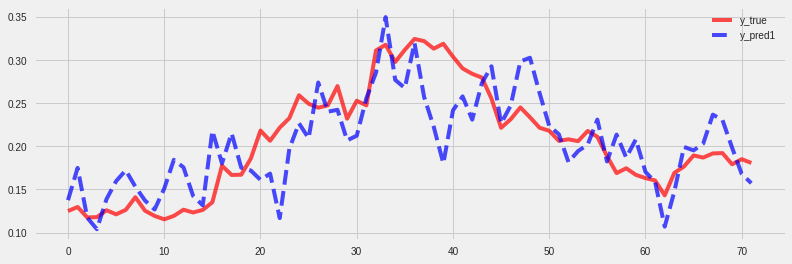

In [21]:
import tensorflow as tf
import time
 
# Processing Units logs
log_device_placement = True

train_size = int(len(dataY)*0.7)
test_size = len(dataY)-train_size

trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

start_time = time.time()
with tf.device('gpu:0'):
    tf.reset_default_graph()

    # input placeholders
    X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
    Y = tf.placeholder(tf.float32, [None,1])

    hidden_dim = 240

    cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

    Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1], output_dim, activation_fn=None)


    # cost/loss
    loss = tf.reduce_sum(tf.square(Y_pred-Y)) # rmse

    # optimizer
    optimizer = tf.train.AdamOptimizer(0.000001) # pG learning_rate = 0.00004
    train = optimizer.minimize(loss)

with tf.Session(config=tf.ConfigProto(log_device_placement=log_device_placement)) as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(10001) :
        _, l = sess.run([train, loss],
        feed_dict={X : trainX, Y : trainY})

        if i % 2000 == 0 :
            e = int(time.time() - start_time)
            print(i, l ," / runtime - ",'{:02d}:{:02d}:{:02d}'.format(e // 3600, (e % 3600 // 60), e % 60))

            testPredict = sess.run(Y_pred, feed_dict={X : testX})

            plt.figure(figsize=(12,4))
            plt.plot(testY, 'r-', alpha=0.7, label='y_true')
            plt.plot(testPredict, 'b--', alpha=0.7, label='y_pred1')
            plt.legend()
            plt.show()